In [1]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [2]:
book_old_testament_possible_titles = str('Genesis Exodus Leviticus Numbers Deuteronomy Joshua Judges Ruth Samuel Kings Chronicles Ezra Nehemiah Esther Job Psalms Proverbs Ecclesiastes Song Isaiah Jeremiah Lamentations Ezekiel Daniel Hosea Joel Amos Obadiah Jonah Micah Nahum Habakkuk Zephaniah Haggai Zechariah Malachi').split()
book_new_testament_possible_titles = str('Matthew Mark Luke John Acts Romans Corinthians Galatians Ephesians Philippians Colossians Thessalonians Timothy Titus Philemon Hebrews James Peter John Jude Revelation').split()
NIV_version_possible_titles = book_old_testament_possible_titles + book_new_testament_possible_titles
possible_patten = '^' + '|^'.join(NIV_version_possible_titles)
print('patten:' + str(possible_patten))
raw_line_set = open("Bible_King_James_Version.txt","r").readlines()
def fetch_NIV_version_title(line):
    return re.search(pattern=possible_patten,string=line) is not None
possible_titles = list(filter(fetch_NIV_version_title,raw_line_set))
print('possible title len:' + str(len(possible_titles)))
print(possible_titles)

patten:^Genesis|^Exodus|^Leviticus|^Numbers|^Deuteronomy|^Joshua|^Judges|^Ruth|^Samuel|^Kings|^Chronicles|^Ezra|^Nehemiah|^Esther|^Job|^Psalms|^Proverbs|^Ecclesiastes|^Song|^Isaiah|^Jeremiah|^Lamentations|^Ezekiel|^Daniel|^Hosea|^Joel|^Amos|^Obadiah|^Jonah|^Micah|^Nahum|^Habakkuk|^Zephaniah|^Haggai|^Zechariah|^Malachi|^Matthew|^Mark|^Luke|^John|^Acts|^Romans|^Corinthians|^Galatians|^Ephesians|^Philippians|^Colossians|^Thessalonians|^Timothy|^Titus|^Philemon|^Hebrews|^James|^Peter|^John|^Jude|^Revelation
possible title len:66
['Genesis\n', 'Exodus\n', 'Leviticus\n', 'Numbers\n', 'Deuteronomy\n', 'Joshua\n', 'Judges\n', 'Ruth\n', 'Samuel 1\n', 'Samuel 2\n', 'Kings 1\n', 'Kings 2\n', 'Chronicles 1\n', 'Chronicles 2\n', 'Ezra\n', 'Nehemiah\n', 'Esther\n', 'Job\n', 'Psalms\n', 'Proverbs\n', 'Ecclesiastes\n', 'Song of Solomon\n', 'Isaiah\n', 'Jeremiah\n', 'Lamentations\n', 'Ezekiel\n', 'Daniel\n', 'Hosea\n', 'Joel\n', 'Amos\n', 'Obadiah\n', 'Jonah\n', 'Micah\n', 'Nahum\n', 'Habakkuk\n', 'Zep

In [3]:
raw = open("Bible_King_James_Version.txt","r").read()
patn = '__________________________________________________________________'
# patn = '[cC]hapter(\s+)[1-9]{1,3}'
raw_chapters = re.split(pattern=patn,string=raw)
len(raw_chapters)

1265

In [4]:
def fetch_chapter_index(raw_chp):
    return re.search(pattern='[cC]hapter(\s+)(.*)(\s?)[0-9]{1,3}',string=raw_chp) is not None
def chapter_content_clean(raw_chp):
    letters_only = re.sub('[^a-zA-Z0-9]', ' ', raw_chp)
    words = letters_only.lower().split()
    stopwords_eng = set(stopwords.words("english") + ['chapter'])
    useful_words = [x for x in words if not x in stopwords_eng]
    # Combine words into a paragraph again
    useful_words_string = ' '.join(useful_words)
    return(useful_words_string)
chapter_index_set = list(filter(fetch_chapter_index,raw_chapters))
chapter_index_set = list(map(lambda x:x.strip(),chapter_index_set))
clean_chapters = list(map(chapter_content_clean,chapter_index_set))
print(len(chapter_index_set))
print(len(clean_chapters))
# print(chapter_index_set[np.random.choice(len(chapter_index_set))])
# print(clean_chapters[-1])
# print(raw_chapters[7:9])
# print(clean_chapters[6:8])

1189
1189


In [5]:
chapter_first_patten = '([cC]hapter(\s+)([a-zA-Z]*)(\s?)1\n\n)'
chapter_first = list(filter(lambda x: re.search(pattern=chapter_first_patten,string=x) is not None, chapter_index_set))
print('num of chapter_first:' + str(len(chapter_first)))
# chapter_first[np.random.choice(len(chapter_first))]
def print_enumerate_in_format(mass):
    print('\n'.join('{}: {}'.format(*k) for k in enumerate(mass)))

num of chapter_first:66


In [6]:
np.random.choice(chapter_index_set)

"Chapter 116\n\n   I love the Lord, because he hath heard my voice and my supplications.\n\n   ^2Because he hath inclined his ear unto me, therefore will I call upon\n   him as long as I live.\n\n   ^3The sorrows of death compassed me, and the pains of hell gat hold\n   upon me: I found trouble and sorrow.\n\n   ^4Then called I upon the name of the Lord; O Lord, I beseech thee,\n   deliver my soul.\n\n   ^5Gracious is the Lord, and righteous; yea, our God is merciful.\n\n   ^6The Lord preserveth the simple: I was brought low, and he helped me.\n\n   ^7Return unto thy rest, O my soul; for the Lord hath dealt bountifully\n   with thee.\n\n   ^8For thou hast delivered my soul from death, mine eyes from tears, and\n   my feet from falling.\n\n   ^9I will walk before the Lord in the land of the living.\n\n   ^10I believed, therefore have I spoken: I was greatly afflicted:\n\n   ^11I said in my haste, All men are liars.\n\n   ^12What shall I render unto the Lord for all his benefits toward m

In [7]:
#Phase: build clen dictionary which contains every NIV chapter in chapter level

In [8]:
dictionary_chapter_level = {}
dictionary_section_level = {}
book_index = -1;chapter_index = None
for cha in chapter_index_set:
    if book_index <= len(possible_titles) and re.search(pattern=chapter_first_patten,string=cha) is not None:
        book_index += 1
    section_list = list(re.split('\^\d+',cha))
    non_num_cha = re.sub('\^\d+','',cha)
    chapter_first_context = list(re.split('\n+',section_list[0].strip()))
    chapter_index = chapter_first_context[0].strip()
    book_index_str = possible_titles[book_index].strip()+'_'+chapter_index.strip()
    dictionary_chapter_level[book_index_str] = '_'.join([possible_titles[book_index].strip(),non_num_cha.strip()])
    dictionary_section_level[book_index_str] = section_list
pick_num = np.random.choice(len(dictionary_chapter_level))
print(list(dictionary_chapter_level.keys())[pick_num])
print(list(dictionary_chapter_level.values())[pick_num])
print_enumerate_in_format(list(dictionary_section_level.values())[pick_num])

Psalms_Chapter 75
Psalms_Chapter 75

   Unto thee, O God, do we give thanks, unto thee do we give thanks: for
   that thy name is near thy wondrous works declare.

   When I shall receive the congregation I will judge uprightly.

   The earth and all the inhabitants thereof are dissolved: I bear up
   the pillars of it. Selah.

   I said unto the fools, Deal not foolishly: and to the wicked, Lift
   not up the horn:

   Lift not up your horn on high: speak not with a stiff neck.

   For promotion cometh neither from the east, nor from the west, nor
   from the south.

   But God is the judge: he putteth down one, and setteth up another.

   For in the hand of the Lord there is a cup, and the wine is red; it
   is full of mixture; and he poureth out of the same: but the dregs
   thereof, all the wicked of the earth shall wring them out, and drink
   them.

   But I will declare for ever; I will sing praises to the God of Jacob.

   All the horns of the wicked also will I cut off; but th

In [9]:
clean_dictionary_chapter_level = dict(zip(dictionary_chapter_level.keys(),list(map(chapter_content_clean,dictionary_chapter_level.values()))))

In [10]:
# pick_num = np.random.choice(len(dictionary_chapter_level))
# print(list(clean_dictionary_chapter_level.keys())[pick_num])
# print(list(clean_dictionary_chapter_level.values())[pick_num])

In [11]:
#init TF-IDF vectorizer model

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
# for python 3.x 
# from cltk.stop.middle_english.stops import STOPS_LIST
nltk.download('punkt')

stemmer = PorterStemmer()
def stem_words(words_list, stemmer):
    return [stemmer.stem(word) for word in words_list]

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_words(tokens,stemmer)
    return stems

tfidf = TfidfVectorizer(tokenizer = tokenize,stop_words='english',max_features=777)
# tfidf = TfidfVectorizer(tokenizer = tokenize,stop_words='english',max_features=77)
tfidf_matrix = tfidf.fit_transform(list(clean_dictionary_chapter_level.values()))
tfidf_feature_name = tfidf.get_feature_names()

[nltk_data] Downloading package punkt to /Users/philo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
print("n_samples: %d, n_features: %d" % tfidf_matrix.shape)
'god' in tfidf_feature_name
print(tfidf_feature_name)

n_samples: 1189, n_features: 777
[u'1', u'2', u'aaron', u'abid', u'abl', u'abod', u'abomin', u'abraham', u'abroad', u'absalom', u'abund', u'accept', u'accord', u'act', u'afflict', u'afraid', u'afterward', u'ahab', u'aliv', u'alon', u'altar', u'alway', u'amen', u'ammon', u'amorit', u'angel', u'anger', u'anoint', u'anoth', u'answer', u'apostl', u'appear', u'appoint', u'aris', u'ark', u'arm', u'armi', u'aros', u'art', u'asham', u'asid', u'ask', u'ass', u'assembl', u'assyria', u'aton', u'away', u'baal', u'babylon', u'baptiz', u'bare', u'battl', u'bear', u'beast', u'beauti', u'becam', u'becom', u'bed', u'began', u'begat', u'begin', u'behold', u'believ', u'belov', u'benjamin', u'beseech', u'besid', u'better', u'bless', u'blind', u'blood', u'bodi', u'bone', u'book', u'border', u'born', u'bound', u'bow', u'brake', u'branch', u'brass', u'bread', u'breadth', u'break', u'brethren', u'bring', u'bringeth', u'broken', u'brother', u'brought', u'build', u'built', u'bullock', u'burden', u'buri', u'burn

In [17]:
import pandas as pd
denselist=tfidf_matrix.todense().tolist()
print(type(denselist))
df = pd.DataFrame(denselist,columns=tfidf_feature_name)
df.head()
# df = df.loc[:, (df != 0).any(axis=0)]
# df.info()

<type 'list'>


,1,2,aaron,abid,abl,abod,abomin,abraham,abroad,absalom,...,wrath,write,written,wrought,ye,yea,year,young,youth,zion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.089225,0.00000,0.032640,0.041235,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.081650,0.00000,0.059738,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.06853,0.000000,0.037594,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.109265,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.400657
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.127280,0.00000,0.000000,0.000000,0.0,0.144067


In [18]:
#Finding a Chapter’s Nearest Neighbors with Cosine Distance

In [19]:
from scipy.sparse import csr_matrix

def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )

def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

# save_sparse_csr(data_path + 'laws_tf_idf.npz', tfs)
from sklearn.neighbors import NearestNeighbors

model_tf_idf = NearestNeighbors(metric='cosine', algorithm='brute')
model_tf_idf.fit(tfidf_matrix)

def print_nearest_neighbors(query_tf_idf, full_chapter_dictionary, knn_model, k, flat=False):
    """
    Inputs: a query tf_idf vector, the dictionary of chapters, the knn model, and the number of neighbors
    Prints the k nearest neighbors
    """
    distances, indices = knn_model.kneighbors(query_tf_idf, n_neighbors = k+1)
    nearest_neighbors = [list(full_chapter_dictionary.keys())[x] for x in indices.flatten()]
    
    if flat is False:
        for chapter in range(len(nearest_neighbors)):
            if chapter == 0:
                print('Query Chapter: {0}\n'.format(nearest_neighbors[chapter]))
            else:
                print('{0}: {1}\n'.format(chapter, nearest_neighbors[chapter]))
    elif flat is True:
        string_buffer = ''
        for chapter in range(len(nearest_neighbors)):
            if chapter == 0:
                string_buffer = string_buffer + '{0} \n-- Similar ['.format(nearest_neighbors[chapter])
            else:
                string_buffer = string_buffer + '\n\t{0}: {1},'.format(chapter, nearest_neighbors[chapter])
        string_buffer = string_buffer + '\n\t ... ]\n'
        print(string_buffer)

In [22]:
chapter_index = np.random.choice(tfidf_matrix.shape[0])
print_nearest_neighbors(tfidf_matrix[chapter_index],dictionary_chapter_level,model_tf_idf,k=7)
# print(dictionary_chapter_level['Ecclesiastes;_Chapter 9'])
# print(dictionary_chapter_level['Proverbs_Chapter 14'])

Query Chapter: Exodus_Chapter 5

1: Matthew_Chapter 24

2: Deuteronomy_Chapter 30

3: Psalms_Chapter 13

4: Judges_Chapter 16

5: Leviticus_Chapter 14

6: Jeremiah_Chapter 8

7: Samuel 2_Chapter Samuel 3



In [23]:
for index in range(tfidf_matrix.shape[0]):
    print_nearest_neighbors(tfidf_matrix[index],dictionary_chapter_level,model_tf_idf,k=7,flat=True)

Isaiah_Chapter 7 
-- Similar [
	1: Daniel_Chapter 12,
	2: Isaiah_Chapter 9,
	3: Genesis_Chapter 26,
	4: Job_Chapter 24,
	5: John_Chapter 3,
	6: Chronicles 2_Chapter Chronicles 17,
	7: Chronicles 1_Chapter Chronicles 3,
	 ... ]

Isaiah_Chapter 6 
-- Similar [
	1: Psalms_Chapter 20,
	2: Jeremiah_Chapter 29,
	3: John 3_Chapter 1,
	4: Zephaniah_Chapter 3,
	5: Proverbs_Chapter 16,
	6: Samuel 1_Chapter Samuel 12,
	7: Samuel 1_Chapter Samuel 9,
	 ... ]

Isaiah_Chapter 5 
-- Similar [
	1: Acts of the Apostles_Chapter 8,
	2: Psalms_Chapter 132,
	3: John 3_Chapter 1,
	4: Numbers_Chapter 15,
	5: Job_Chapter 24,
	6: Corinthians 1_Chapter Corinthians 10,
	7: Luke_Chapter 10,
	 ... ]

Isaiah_Chapter 4 
-- Similar [
	1: Job_Chapter 24,
	2: Numbers_Chapter 15,
	3: Ecclesiastes_Chapter 9,
	4: John 3_Chapter 1,
	5: Zephaniah_Chapter 3,
	6: Ezekiel_Chapter 32,
	7: Chronicles 2_Chapter Chronicles 17,
	 ... ]

Isaiah_Chapter 3 
-- Similar [
	1: John 3_Chapter 1,
	2: Psalms_Chapter 57,
	3: Zephaniah_Chapter

Chronicles 2_Chapter Chronicles 4 
-- Similar [
	1: Matthew_Chapter 27,
	2: Proverbs_Chapter 2,
	3: Chronicles 2_Chapter Chronicles 9,
	4: Jeremiah_Chapter 48,
	5: Kings 1_Chapter Kings 18,
	6: Corinthians 2_Chapter Corinthians 4,
	7: Job_Chapter 37,
	 ... ]

Chronicles 2_Chapter Chronicles 7 
-- Similar [
	1: Proverbs_Chapter 2,
	2: Ezekiel_Chapter 15,
	3: Isaiah_Chapter 36,
	4: Nehemiah_Chapter 6,
	5: Exodus_Chapter 24,
	6: Chronicles 1_Chapter Chronicles 14,
	7: Ruth_Chapter 4,
	 ... ]

Genesis_Chapter 45 
-- Similar [
	1: Exodus_Chapter 40,
	2: Psalms_Chapter 94,
	3: Matthew_Chapter 27,
	4: Chronicles 2_Chapter Chronicles 9,
	5: Job_Chapter 37,
	6: Corinthians 2_Chapter Corinthians 4,
	7: Job_Chapter 36,
	 ... ]

Chronicles 2_Chapter Chronicles 1 
-- Similar [
	1: Job_Chapter 34,
	2: Kings 2_Chapter Kings 11,
	3: Esther_Chapter 10,
	4: Chronicles 2_Chapter Chronicles 5,
	5: Kings 2_Chapter Kings 10,
	6: Amos_Chapter 5,
	7: Genesis_Chapter 11,
	 ... ]

Chronicles 2_Chapter Chronicle

Samuel 2_Chapter Samuel 21 
-- Similar [
	1: Chronicles 1_Chapter Chronicles 15,
	2: Psalms_Chapter 14,
	3: Chronicles 1_Chapter Chronicles 8,
	4: Ezekiel_Chapter 5,
	5: Jeremiah_Chapter 41,
	6: Romans_Chapter 2,
	7: Judges_Chapter 2,
	 ... ]

Amos_Chapter 9 
-- Similar [
	1: Job_Chapter 17,
	2: Corinthians 2_Chapter Corinthians 13,
	3: Joshua_Chapter 6,
	4: Psalms_Chapter 123,
	5: Ezekiel_Chapter 23,
	6: Joshua_Chapter 2,
	7: John_Chapter 10,
	 ... ]

Peter 2_Chapter Peter 2 
-- Similar [
	1: Jeremiah_Chapter 33,
	2: Jeremiah_Chapter 36,
	3: Jude_Chapter 1,
	4: Chronicles 2_Chapter Chronicles 25,
	5: Chronicles 2_Chapter Chronicles 26,
	6: Ezekiel_Chapter 36,
	7: Ecclesiastes_Chapter 5,
	 ... ]

Ezra_Chapter 10 
-- Similar [
	1: Corinthians 2_Chapter Corinthians 8,
	2: Titus_Chapter 1,
	3: Peter 2_Chapter Peter 2,
	4: Psalms_Chapter 64,
	5: Isaiah_Chapter 33,
	6: Chronicles 2_Chapter Chronicles 32,
	7: Chronicles 2_Chapter Chronicles 26,
	 ... ]

Jeremiah_Chapter 33 
-- Similar [
	1: 

Ephesians_Chapter 2 
-- Similar [
	1: Ruth_Chapter 3,
	2: Chronicles 1_Chapter Chronicles 11,
	3: Samuel 1_Chapter Samuel 13,
	4: Luke_Chapter 8,
	5: Ezekiel_Chapter 35,
	6: Corinthians 1_Chapter Corinthians 1,
	7: Nehemiah_Chapter 9,
	 ... ]

Matthew_Chapter 22 
-- Similar [
	1: Chronicles 2_Chapter Chronicles 20,
	2: Chronicles 2_Chapter Chronicles 23,
	3: Psalms_Chapter 112,
	4: Luke_Chapter 4,
	5: Psalms_Chapter 127,
	6: Chronicles 2_Chapter Chronicles 21,
	7: Acts of the Apostles_Chapter 25,
	 ... ]

Isaiah_Chapter 39 
-- Similar [
	1: Matthew_Chapter 22,
	2: Song of Solomon_Chapter 5,
	3: Leviticus_Chapter 21,
	4: Psalms_Chapter 35,
	5: Jeremiah_Chapter 12,
	6: Psalms_Chapter 37,
	7: Samuel 2_Chapter Samuel 19,
	 ... ]

Luke_Chapter 18 
-- Similar [
	1: Esther_Chapter 6,
	2: Exodus_Chapter 33,
	3: Psalms_Chapter 19,
	4: Corinthians 1_Chapter Corinthians 1,
	5: Chronicles 2_Chapter Chronicles 33,
	6: Psalms_Chapter 108,
	7: Timothy 1_Chapter Timothy 1,
	 ... ]

Psalms_Chapter 36 


Zechariah_Chapter 4 
-- Similar [
	1: Ecclesiastes_Chapter 2,
	2: Chronicles 2_Chapter Chronicles 12,
	3: Zechariah_Chapter 8,
	4: Isaiah_Chapter 44,
	5: Romans_Chapter 12,
	6: Zechariah_Chapter 2,
	7: Ezekiel_Chapter 41,
	 ... ]

Isaiah_Chapter 45 
-- Similar [
	1: Genesis_Chapter 40,
	2: Matthew_Chapter 21,
	3: Exodus_Chapter 35,
	4: Ezra_Chapter 7,
	5: Proverbs_Chapter 25,
	6: Nahum_Chapter 2,
	7: Deuteronomy_Chapter 9,
	 ... ]

Ezekiel_Chapter 14 
-- Similar [
	1: Genesis_Chapter 31,
	2: Samuel 2_Chapter Samuel 5,
	3: John 1_Chapter John 2,
	4: Luke_Chapter 15,
	5: Kings 1_Chapter Kings 3,
	6: Ecclesiastes_Chapter 12,
	7: John 1_Chapter John 3,
	 ... ]

Genesis_Chapter 9 
-- Similar [
	1: Kings 2_Chapter Kings 19,
	2: Joshua_Chapter 12,
	3: Samuel 2_Chapter Samuel 16,
	4: Samuel 2_Chapter Samuel 15,
	5: Acts of the Apostles_Chapter 5,
	6: Proverbs_Chapter 28,
	7: Daniel_Chapter 2,
	 ... ]

Genesis_Chapter 8 
-- Similar [
	1: Daniel_Chapter 12,
	2: Job_Chapter 24,
	3: Numbers_Chapte

Zechariah_Chapter 10 
-- Similar [
	1: Peter 1_Chapter Peter 4,
	2: Psalms_Chapter 61,
	3: Exodus_Chapter 9,
	4: Leviticus_Chapter 18,
	5: Genesis_Chapter 23,
	6: Deuteronomy_Chapter 16,
	7: Psalms_Chapter 74,
	 ... ]

Peter 1_Chapter Peter 3 
-- Similar [
	1: Psalms_Chapter 17,
	2: Job_Chapter 7,
	3: Hosea_Chapter 7,
	4: Joshua_Chapter 11,
	5: Psalms_Chapter 49,
	6: Luke_Chapter 13,
	7: Jeremiah_Chapter 13,
	 ... ]

Acts of the Apostles_Chapter 25 
-- Similar [
	1: Chronicles 2_Chapter Chronicles 22,
	2: Deuteronomy_Chapter 6,
	3: Chronicles 2_Chapter Chronicles 20,
	4: Chronicles 2_Chapter Chronicles 23,
	5: Psalms_Chapter 127,
	6: Matthew_Chapter 22,
	7: Chronicles 2_Chapter Chronicles 21,
	 ... ]

Deuteronomy_Chapter 6 
-- Similar [
	1: Acts of the Apostles_Chapter 25,
	2: Chronicles 2_Chapter Chronicles 23,
	3: Psalms_Chapter 127,
	4: Chronicles 2_Chapter Chronicles 20,
	5: Chronicles 2_Chapter Chronicles 22,
	6: Chronicles 2_Chapter Chronicles 29,
	7: Chronicles 2_Chapter Chronic

Proverbs_Chapter 25 
-- Similar [
	1: Kings 1_Chapter Kings 19,
	2: Micah_Chapter 4,
	3: Genesis_Chapter 42,
	4: Corinthians 1_Chapter Corinthians 9,
	5: Numbers_Chapter 21,
	6: Jeremiah_Chapter 1,
	7: Ezekiel_Chapter 2,
	 ... ]

Proverbs_Chapter 26 
-- Similar [
	1: Proverbs_Chapter 25,
	2: Genesis_Chapter 42,
	3: Isaiah_Chapter 35,
	4: Kings 1_Chapter Kings 19,
	5: Psalms_Chapter 105,
	6: Numbers_Chapter 21,
	7: Ruth_Chapter 1,
	 ... ]

Proverbs_Chapter 27 
-- Similar [
	1: John_Chapter 12,
	2: John_Chapter 13,
	3: Hosea_Chapter 13,
	4: Judges_Chapter 2,
	5: Ezekiel_Chapter 18,
	6: Joshua_Chapter 10,
	7: John 1_Chapter John 4,
	 ... ]

Acts of the Apostles_Chapter 8 
-- Similar [
	1: John_Chapter 3,
	2: Psalms_Chapter 106,
	3: Job_Chapter 24,
	4: Corinthians 1_Chapter Corinthians 10,
	5: Genesis_Chapter 26,
	6: Kings 2_Chapter Kings 25,
	7: Daniel_Chapter 12,
	 ... ]

Zechariah_Chapter 12 
-- Similar [
	1: Proverbs_Chapter 31,
	2: Leviticus_Chapter 21,
	3: Kings 1_Chapter Kings 6,
	4

Ezra_Chapter 6 
-- Similar [
	1: Corinthians 2_Chapter Corinthians 13,
	2: Job_Chapter 17,
	3: Exodus_Chapter 26,
	4: Joshua_Chapter 1,
	5: Ezekiel_Chapter 22,
	6: Job_Chapter 15,
	7: Isaiah_Chapter 30,
	 ... ]

Ezra_Chapter 7 
-- Similar [
	1: Leviticus_Chapter 9,
	2: Exodus_Chapter 35,
	3: Matthew_Chapter 7,
	4: Isaiah_Chapter 45,
	5: Leviticus_Chapter 7,
	6: Leviticus_Chapter 3,
	7: Leviticus_Chapter 2,
	 ... ]

Ezra_Chapter 4 
-- Similar [
	1: Kings 1_Chapter Kings 13,
	2: Chronicles 2_Chapter Chronicles 34,
	3: Timothy 1_Chapter Timothy 5,
	4: John_Chapter 9,
	5: Daniel_Chapter 6,
	6: Psalms_Chapter 42,
	7: Luke_Chapter 9,
	 ... ]

Ezra_Chapter 5 
-- Similar [
	1: Ruth_Chapter 1,
	2: Isaiah_Chapter 35,
	3: Numbers_Chapter 21,
	4: Kings 1_Chapter Kings 19,
	5: Psalms_Chapter 104,
	6: Joshua_Chapter 15,
	7: Jeremiah_Chapter 1,
	 ... ]

Ezra_Chapter 2 
-- Similar [
	1: Zechariah_Chapter 6,
	2: Acts of the Apostles_Chapter 28,
	3: Proverbs_Chapter 30,
	4: Jeremiah_Chapter 38,
	5: Samu

Amos_Chapter 2 
-- Similar [
	1: Kings 1_Chapter Kings 19,
	2: Jonah_Chapter 1,
	3: Ezekiel_Chapter 2,
	4: Lamentations_Chapter 2,
	5: Galatians_Chapter 3,
	6: Nehemiah_Chapter 6,
	7: Job_Chapter 19,
	 ... ]

Matthew_Chapter 20 
-- Similar [
	1: Samuel 2_Chapter Samuel 18,
	2: Daniel_Chapter 1,
	3: Amos_Chapter 2,
	4: Psalms_Chapter 57,
	5: Jeremiah_Chapter 20,
	6: Job_Chapter 32,
	7: Proverbs_Chapter 5,
	 ... ]

Timothy 2_Chapter Timothy 1 
-- Similar [
	1: Job_Chapter 32,
	2: Job_Chapter 24,
	3: Proverbs_Chapter 16,
	4: Jeremiah_Chapter 27,
	5: Joshua_Chapter 11,
	6: Psalms_Chapter 149,
	7: Micah_Chapter 3,
	 ... ]

Thessalonians 2_Chapter Thessalonians 3 
-- Similar [
	1: Psalms_Chapter 149,
	2: Psalms_Chapter 59,
	3: Hosea_Chapter 1,
	4: Psalms_Chapter 120,
	5: Psalms_Chapter 57,
	6: Psalms_Chapter 23,
	7: Ephesians_Chapter 6,
	 ... ]

Thessalonians 2_Chapter Thessalonians 2 
-- Similar [
	1: Psalms_Chapter 59,
	2: Job_Chapter 32,
	3: Psalms_Chapter 44,
	4: John_Chapter 1,
	5: Jere

Deuteronomy_Chapter 21 
-- Similar [
	1: Luke_Chapter 9,
	2: Deuteronomy_Chapter 22,
	3: Genesis_Chapter 13,
	4: Isaiah_Chapter 42,
	5: Isaiah_Chapter 51,
	6: Jeremiah_Chapter 32,
	7: Ezra_Chapter 8,
	 ... ]

Deuteronomy_Chapter 20 
-- Similar [
	1: Numbers_Chapter 1,
	2: Luke_Chapter 23,
	3: Psalms_Chapter 61,
	4: Samuel 1_Chapter Samuel 30,
	5: Leviticus_Chapter 18,
	6: Deuteronomy_Chapter 16,
	7: Ezekiel_Chapter 20,
	 ... ]

Deuteronomy_Chapter 23 
-- Similar [
	1: Proverbs_Chapter 28,
	2: Samuel 2_Chapter Samuel 20,
	3: Samuel 2_Chapter Samuel 16,
	4: Exodus_Chapter 18,
	5: Daniel_Chapter 2,
	6: Samuel 2_Chapter Samuel 3,
	7: Samuel 2_Chapter Samuel 15,
	 ... ]

Deuteronomy_Chapter 22 
-- Similar [
	1: Isaiah_Chapter 42,
	2: Genesis_Chapter 13,
	3: Peter 1_Chapter Peter 2,
	4: Ezra_Chapter 8,
	5: Deuteronomy_Chapter 21,
	6: Luke_Chapter 9,
	7: Corinthians 1_Chapter Corinthians 2,
	 ... ]

Isaiah_Chapter 40 
-- Similar [
	1: Corinthians 1_Chapter Corinthians 10,
	2: Psalms_Chapter 1

Proverbs_Chapter 7 
-- Similar [
	1: Luke_Chapter 7,
	2: Exodus_Chapter 12,
	3: Psalms_Chapter 149,
	4: Jonah_Chapter 3,
	5: Ecclesiastes_Chapter 3,
	6: Jonah_Chapter 1,
	7: John_Chapter 21,
	 ... ]

Proverbs_Chapter 6 
-- Similar [
	1: Ezekiel_Chapter 38,
	2: Isaiah_Chapter 28,
	3: Job_Chapter 1,
	4: Song of Solomon_Chapter 1,
	5: Ephesians_Chapter 5,
	6: Ezekiel_Chapter 4,
	7: Corinthians 2_Chapter Corinthians 9,
	 ... ]

Jonah_Chapter 3 
-- Similar [
	1: Psalms_Chapter 149,
	2: Kings 2_Chapter Kings 20,
	3: Exodus_Chapter 12,
	4: Jeremiah_Chapter 20,
	5: Psalms_Chapter 57,
	6: Daniel_Chapter 5,
	7: Kings 2_Chapter Kings 25,
	 ... ]

Jonah_Chapter 2 
-- Similar [
	1: Habakkuk_Chapter 2,
	2: Leviticus_Chapter 12,
	3: Jeremiah_Chapter 15,
	4: Samuel 2_Chapter Samuel 19,
	5: Nahum_Chapter 3,
	6: Psalms_Chapter 62,
	7: Habakkuk_Chapter 1,
	 ... ]

Jonah_Chapter 1 
-- Similar [
	1: Job_Chapter 19,
	2: Psalms_Chapter 149,
	3: Samuel 1_Chapter Samuel 14,
	4: Amos_Chapter 2,
	5: Job_Chapter 

Hebrews_Chapter 9 
-- Similar [
	1: Kings 1_Chapter Kings 5,
	2: Psalms_Chapter 95,
	3: Acts of the Apostles_Chapter 4,
	4: John_Chapter 11,
	5: Psalms_Chapter 113,
	6: Genesis_Chapter 43,
	7: James_Chapter 2,
	 ... ]

Hebrews_Chapter 2 
-- Similar [
	1: Luke_Chapter 24,
	2: Acts of the Apostles_Chapter 14,
	3: Hosea_Chapter 5,
	4: Hebrews_Chapter 9,
	5: Psalms_Chapter 110,
	6: Psalms_Chapter 95,
	7: Psalms_Chapter 99,
	 ... ]

Hebrews_Chapter 10 
-- Similar [
	1: Mark_Chapter 16,
	2: Samuel 1_Chapter Samuel 26,
	3: Kings 2_Chapter Kings 15,
	4: Corinthians 1_Chapter Corinthians 8,
	5: Titus_Chapter 2,
	6: Leviticus_Chapter 21,
	7: Isaiah_Chapter 16,
	 ... ]

Matthew_Chapter 28 
-- Similar [
	1: Jeremiah_Chapter 51,
	2: Kings 1_Chapter Kings 6,
	3: Kings 2_Chapter Kings 25,
	4: Joshua_Chapter 21,
	5: Isaiah_Chapter 4,
	6: Zechariah_Chapter 12,
	7: Zephaniah_Chapter 3,
	 ... ]

John_Chapter 10 
-- Similar [
	1: Ezekiel_Chapter 23,
	2: Psalms_Chapter 10,
	3: Corinthians 2_Chapter Corinth

Chronicles 1_Chapter Chronicles 29 
-- Similar [
	1: John_Chapter 14,
	2: Chronicles 1_Chapter Chronicles 25,
	3: Mark_Chapter 13,
	4: Chronicles 1_Chapter Chronicles 28,
	5: Samuel 1_Chapter Samuel 23,
	6: Samuel 1_Chapter Samuel 17,
	7: Proverbs_Chapter 26,
	 ... ]

Chronicles 1_Chapter Chronicles 28 
-- Similar [
	1: Proverbs_Chapter 15,
	2: Leviticus_Chapter 7,
	3: Joshua_Chapter 7,
	4: Kings 2_Chapter Kings 14,
	5: Acts of the Apostles_Chapter 11,
	6: Chronicles 1_Chapter Chronicles 29,
	7: Ezekiel_Chapter 3,
	 ... ]

Proverbs_Chapter 11 
-- Similar [
	1: Samuel 1_Chapter Samuel 11,
	2: Isaiah_Chapter 57,
	3: Proverbs_Chapter 12,
	4: Isaiah_Chapter 38,
	5: Isaiah_Chapter 34,
	6: Jeremiah_Chapter 17,
	7: Leviticus_Chapter 9,
	 ... ]

Proverbs_Chapter 10 
-- Similar [
	1: Nehemiah_Chapter 4,
	2: Acts of the Apostles_Chapter 4,
	3: Exodus_Chapter 27,
	4: John_Chapter 11,
	5: Proverbs_Chapter 13,
	6: Isaiah_Chapter 52,
	7: Matthew_Chapter 9,
	 ... ]

Proverbs_Chapter 13 
-- Similar [


John_Chapter 4 
-- Similar [
	1: Leviticus_Chapter 27,
	2: Hebrews_Chapter 1,
	3: Corinthians 1_Chapter Corinthians 8,
	4: Genesis_Chapter 36,
	5: James_Chapter 4,
	6: Psalms_Chapter 72,
	7: Ezekiel_Chapter 16,
	 ... ]

Psalms_Chapter 149 
-- Similar [
	1: Exodus_Chapter 12,
	2: Jonah_Chapter 1,
	3: Psalms_Chapter 120,
	4: Psalms_Chapter 44,
	5: Isaiah_Chapter 8,
	6: Job_Chapter 30,
	7: Thessalonians 2_Chapter Thessalonians 3,
	 ... ]

Psalms_Chapter 47 
-- Similar [
	1: Chronicles 2_Chapter Chronicles 7,
	2: Proverbs_Chapter 2,
	3: Ezekiel_Chapter 15,
	4: Exodus_Chapter 24,
	5: Ruth_Chapter 3,
	6: Chronicles 1_Chapter Chronicles 14,
	7: Corinthians 1_Chapter Corinthians 9,
	 ... ]

Isaiah_Chapter 20 
-- Similar [
	1: Job_Chapter 42,
	2: John_Chapter 2,
	3: Acts of the Apostles_Chapter 21,
	4: John_Chapter 3,
	5: Psalms_Chapter 141,
	6: Job_Chapter 41,
	7: Psalms_Chapter 31,
	 ... ]

Job_Chapter 42 
-- Similar [
	1: Isaiah_Chapter 20,
	2: Psalms_Chapter 143,
	3: Isaiah_Chapter 62,
	4: 

Kings 2_Chapter Kings 6 
-- Similar [
	1: Daniel_Chapter 6,
	2: Timothy 1_Chapter Timothy 1,
	3: Kings 2_Chapter Kings 9,
	4: Chronicles 2_Chapter Chronicles 33,
	5: Timothy 1_Chapter Timothy 5,
	6: Corinthians 1_Chapter Corinthians 11,
	7: Romans_Chapter 14,
	 ... ]

Kings 2_Chapter Kings 5 
-- Similar [
	1: John 1_Chapter John 5,
	2: Deuteronomy_Chapter 29,
	3: Nahum_Chapter 2,
	4: Psalms_Chapter 94,
	5: Psalms_Chapter 41,
	6: Joel_Chapter 2,
	7: Amos_Chapter 5,
	 ... ]

Kings 2_Chapter Kings 4 
-- Similar [
	1: John_Chapter 6,
	2: Chronicles 2_Chapter Chronicles 24,
	3: Chronicles 1_Chapter Chronicles 23,
	4: Genesis_Chapter 10,
	5: Psalms_Chapter 51,
	6: Isaiah_Chapter 39,
	7: Leviticus_Chapter 11,
	 ... ]

Corinthians 1_Chapter Corinthians 16 
-- Similar [
	1: Timothy 1_Chapter Timothy 5,
	2: Ezra_Chapter 4,
	3: Kings 1_Chapter Kings 13,
	4: Daniel_Chapter 6,
	5: Romans_Chapter 14,
	6: Jeremiah_Chapter 39,
	7: Timothy 1_Chapter Timothy 6,
	 ... ]

Kings 2_Chapter Kings 9 
-- Simil

Kings 2_Chapter Kings 17 
-- Similar [
	1: Psalms_Chapter 138,
	2: Esther_Chapter 7,
	3: John_Chapter 3,
	4: Genesis_Chapter 16,
	5: Psalms_Chapter 39,
	6: Psalms_Chapter 134,
	7: Chronicles 2_Chapter Chronicles 17,
	 ... ]

Kings 2_Chapter Kings 16 
-- Similar [
	1: Psalms_Chapter 102,
	2: Luke_Chapter 11,
	3: Samuel 2_Chapter Samuel 4,
	4: Leviticus_Chapter 7,
	5: Leviticus_Chapter 3,
	6: Kings 2_Chapter Kings 14,
	7: Leviticus_Chapter 8,
	 ... ]

Kings 2_Chapter Kings 15 
-- Similar [
	1: Esther_Chapter 5,
	2: Corinthians 1_Chapter Corinthians 8,
	3: Hebrews_Chapter 1,
	4: Genesis_Chapter 36,
	5: Genesis_Chapter 37,
	6: Isaiah_Chapter 16,
	7: John_Chapter 15,
	 ... ]

Kings 2_Chapter Kings 14 
-- Similar [
	1: Kings 2_Chapter Kings 16,
	2: Jeremiah_Chapter 19,
	3: Chronicles 1_Chapter Chronicles 28,
	4: Proverbs_Chapter 15,
	5: Psalms_Chapter 102,
	6: John_Chapter 3,
	7: Samuel 1_Chapter Samuel 9,
	 ... ]

Kings 2_Chapter Kings 13 
-- Similar [
	1: Kings 2_Chapter Kings 10,
	2: King

Deuteronomy_Chapter 15 
-- Similar [
	1: Nehemiah_Chapter 10,
	2: Deuteronomy_Chapter 14,
	3: Kings 2_Chapter Kings 7,
	4: Ezekiel_Chapter 21,
	5: Nehemiah_Chapter 11,
	6: Samuel 1_Chapter Samuel 2,
	7: Acts of the Apostles_Chapter 5,
	 ... ]

Deuteronomy_Chapter 16 
-- Similar [
	1: Samuel 2_Chapter Samuel 16,
	2: Luke_Chapter 23,
	3: Joshua_Chapter 12,
	4: Ezekiel_Chapter 20,
	5: Acts of the Apostles_Chapter 5,
	6: Deuteronomy_Chapter 14,
	7: Deuteronomy_Chapter 19,
	 ... ]

Deuteronomy_Chapter 17 
-- Similar [
	1: Psalms_Chapter 58,
	2: Isaiah_Chapter 30,
	3: Samuel 1_Chapter Samuel 8,
	4: Chronicles 2_Chapter Chronicles 8,
	5: Deuteronomy_Chapter 33,
	6: Isaiah_Chapter 54,
	7: Kings 1_Chapter Kings 9,
	 ... ]

Deuteronomy_Chapter 18 
-- Similar [
	1: Corinthians 1_Chapter Corinthians 15,
	2: Samuel 2_Chapter Samuel 11,
	3: Samuel 2_Chapter Samuel 20,
	4: Samuel 2_Chapter Samuel 16,
	5: Samuel 2_Chapter Samuel 10,
	6: Lamentations_Chapter 4,
	7: Joshua_Chapter 12,
	 ... ]

Deuterono

John_Chapter 13 
-- Similar [
	1: John_Chapter 12,
	2: Ezekiel_Chapter 18,
	3: Jeremiah_Chapter 32,
	4: Proverbs_Chapter 27,
	5: Joshua_Chapter 10,
	6: Judges_Chapter 2,
	7: Hosea_Chapter 13,
	 ... ]

John_Chapter 12 
-- Similar [
	1: Proverbs_Chapter 27,
	2: John_Chapter 13,
	3: Judges_Chapter 2,
	4: Ezekiel_Chapter 18,
	5: Joshua_Chapter 10,
	6: Hosea_Chapter 13,
	7: Jeremiah_Chapter 46,
	 ... ]

Genesis_Chapter 48 
-- Similar [
	1: Genesis_Chapter 12,
	2: Isaiah_Chapter 63,
	3: Isaiah_Chapter 60,
	4: Ezekiel_Chapter 37,
	5: Job_Chapter 23,
	6: Isaiah_Chapter 61,
	7: Matthew_Chapter 18,
	 ... ]

Genesis_Chapter 49 
-- Similar [
	1: Corinthians 2_Chapter Corinthians 11,
	2: Mark_Chapter 14,
	3: Genesis_Chapter 35,
	4: Psalms_Chapter 18,
	5: Genesis_Chapter 33,
	6: Psalms_Chapter 5,
	7: Proverbs_Chapter 8,
	 ... ]

Psalms_Chapter 18 
-- Similar [
	1: Psalms_Chapter 5,
	2: Nehemiah_Chapter 3,
	3: Genesis_Chapter 33,
	4: Genesis_Chapter 35,
	5: Proverbs_Chapter 8,
	6: Mark_Chapter 14,
	7

Joshua_Chapter 11 
-- Similar [
	1: Psalms_Chapter 99,
	2: Acts of the Apostles_Chapter 24,
	3: Hosea_Chapter 7,
	4: Proverbs_Chapter 13,
	5: Mark_Chapter 11,
	6: Peter 1_Chapter Peter 3,
	7: Hosea_Chapter 5,
	 ... ]

Hosea_Chapter 7 
-- Similar [
	1: Exodus_Chapter 22,
	2: Genesis_Chapter 26,
	3: Revelation_Chapter 5,
	4: Galatians_Chapter 5,
	5: Job_Chapter 9,
	6: Psalms_Chapter 49,
	7: Joshua_Chapter 11,
	 ... ]

Matthew_Chapter 12 
-- Similar [
	1: Isaiah_Chapter 50,
	2: Chronicles 2_Chapter Chronicles 30,
	3: Jeremiah_Chapter 52,
	4: Chronicles 2_Chapter Chronicles 13,
	5: Psalms_Chapter 110,
	6: Psalms_Chapter 113,
	7: Hebrews_Chapter 9,
	 ... ]

Hosea_Chapter 6 
-- Similar [
	1: Genesis_Chapter 24,
	2: Hosea_Chapter 12,
	3: Isaiah_Chapter 59,
	4: Hosea_Chapter 8,
	5: Judges_Chapter 14,
	6: Psalms_Chapter 38,
	7: Psalms_Chapter 40,
	 ... ]

Hosea_Chapter 1 
-- Similar [
	1: Ezekiel_Chapter 17,
	2: Psalms_Chapter 149,
	3: Thessalonians 2_Chapter Thessalonians 3,
	4: Ezekiel_Chapte

Matthew_Chapter 14 
-- Similar [
	1: Samuel 1_Chapter Samuel 2,
	2: Genesis_Chapter 23,
	3: Ecclesiastes_Chapter 1,
	4: Peter 1_Chapter Peter 5,
	5: Ezra_Chapter 2,
	6: Galatians_Chapter 1,
	7: Hebrews_Chapter 13,
	 ... ]

Isaiah_Chapter 64 
-- Similar [
	1: Leviticus_Chapter 1,
	2: Psalms_Chapter 26,
	3: Psalms_Chapter 98,
	4: Deuteronomy_Chapter 21,
	5: Ezekiel_Chapter 44,
	6: Kings 1_Chapter Kings 19,
	7: Psalms_Chapter 21,
	 ... ]

Isaiah_Chapter 65 
-- Similar [
	1: Isaiah_Chapter 62,
	2: Psalms_Chapter 56,
	3: Isaiah_Chapter 60,
	4: Ezekiel_Chapter 37,
	5: Isaiah_Chapter 59,
	6: Luke_Chapter 14,
	7: Genesis_Chapter 12,
	 ... ]

Ezekiel_Chapter 11 
-- Similar [
	1: Chronicles 1_Chapter Chronicles 16,
	2: Acts of the Apostles_Chapter 25,
	3: John_Chapter 15,
	4: Genesis_Chapter 7,
	5: Daniel_Chapter 6,
	6: Isaiah_Chapter 10,
	7: Psalms_Chapter 108,
	 ... ]

Matthew_Chapter 18 
-- Similar [
	1: Isaiah_Chapter 60,
	2: Ezekiel_Chapter 37,
	3: Jeremiah_Chapter 51,
	4: Genesis_Chapter 2

Mark_Chapter 5 
-- Similar [
	1: Numbers_Chapter 21,
	2: Kings 1_Chapter Kings 19,
	3: Psalms_Chapter 104,
	4: Corinthians 1_Chapter Corinthians 9,
	5: Romans_Chapter 10,
	6: Ezekiel_Chapter 2,
	7: Jeremiah_Chapter 47,
	 ... ]

Mark_Chapter 4 
-- Similar [
	1: Psalms_Chapter 14,
	2: Chronicles 1_Chapter Chronicles 13,
	3: James_Chapter 2,
	4: Ezekiel_Chapter 15,
	5: Daniel_Chapter 10,
	6: Chronicles 1_Chapter Chronicles 15,
	7: Obadiah_Chapter 1,
	 ... ]

Mark_Chapter 3 
-- Similar [
	1: Leviticus_Chapter 21,
	2: Samuel 2_Chapter Samuel 19,
	3: Jonah_Chapter 4,
	4: Jeremiah_Chapter 12,
	5: Kings 1_Chapter Kings 16,
	6: Samuel 2_Chapter Samuel 12,
	7: Isaiah_Chapter 37,
	 ... ]

Numbers_Chapter 26 
-- Similar [
	1: Hebrews_Chapter 1,
	2: Jeremiah_Chapter 17,
	3: Psalms_Chapter 37,
	4: Leviticus_Chapter 21,
	5: Leviticus_Chapter 25,
	6: Matthew_Chapter 13,
	7: Mark_Chapter 3,
	 ... ]

Mark_Chapter 1 
-- Similar [
	1: Deuteronomy_Chapter 8,
	2: Thessalonians 1_Chapter Thessalonians 4,
	3:

Kings 2_Chapter Kings 20 
-- Similar [
	1: Daniel_Chapter 12,
	2: Psalms_Chapter 103,
	3: Philippians_Chapter 2,
	4: John_Chapter 3,
	5: Jonah_Chapter 3,
	6: Psalms_Chapter 107,
	7: Acts of the Apostles_Chapter 8,
	 ... ]

Kings 2_Chapter Kings 21 
-- Similar [
	1: Samuel 1_Chapter Samuel 13,
	2: Samuel 1_Chapter Samuel 14,
	3: Kings 1_Chapter Kings 19,
	4: Nehemiah_Chapter 2,
	5: Nehemiah_Chapter 6,
	6: Numbers_Chapter 21,
	7: Galatians_Chapter 3,
	 ... ]

Kings 2_Chapter Kings 24 
-- Similar [
	1: Jonah_Chapter 1,
	2: Matthew_Chapter 22,
	3: Samuel 1_Chapter Samuel 14,
	4: Psalms_Chapter 133,
	5: Kings 2_Chapter Kings 21,
	6: Job_Chapter 19,
	7: Nehemiah_Chapter 2,
	 ... ]

Kings 2_Chapter Kings 25 
-- Similar [
	1: Jeremiah_Chapter 51,
	2: Exodus_Chapter 12,
	3: Jeremiah_Chapter 29,
	4: Acts of the Apostles_Chapter 8,
	5: Jeremiah_Chapter 26,
	6: Exodus_Chapter 6,
	7: Jeremiah_Chapter 24,
	 ... ]

Job_Chapter 18 
-- Similar [
	1: Isaiah_Chapter 57,
	2: Psalms_Chapter 128,
	3: Kings 

Samuel 1_Chapter Samuel 19 
-- Similar [
	1: Nehemiah_Chapter 6,
	2: Lamentations_Chapter 2,
	3: Proverbs_Chapter 26,
	4: Kings 1_Chapter Kings 19,
	5: Ezekiel_Chapter 2,
	6: Samuel 1_Chapter Samuel 14,
	7: Daniel_Chapter 1,
	 ... ]

Samuel 1_Chapter Samuel 10 
-- Similar [
	1: Lamentations_Chapter 2,
	2: Nehemiah_Chapter 6,
	3: Daniel_Chapter 1,
	4: Hosea_Chapter 10,
	5: Kings 1_Chapter Kings 6,
	6: Corinthians 1_Chapter Corinthians 9,
	7: Samuel 1_Chapter Samuel 19,
	 ... ]

Samuel 1_Chapter Samuel 11 
-- Similar [
	1: Samuel 2_Chapter Samuel 19,
	2: Jeremiah_Chapter 17,
	3: Samuel 1_Chapter Samuel 26,
	4: Proverbs_Chapter 12,
	5: Jonah_Chapter 2,
	6: Psalms_Chapter 76,
	7: Leviticus_Chapter 21,
	 ... ]

Samuel 1_Chapter Samuel 12 
-- Similar [
	1: Job_Chapter 30,
	2: Samuel 1_Chapter Samuel 14,
	3: Psalms_Chapter 149,
	4: Psalms_Chapter 57,
	5: Acts of the Apostles_Chapter 3,
	6: Lamentations_Chapter 2,
	7: Job_Chapter 35,
	 ... ]

Samuel 1_Chapter Samuel 13 
-- Similar [
	1: Kings 

Joshua_Chapter 1 
-- Similar [
	1: Kings 1_Chapter Kings 18,
	2: Ezekiel_Chapter 22,
	3: Isaiah_Chapter 13,
	4: Numbers_Chapter 7,
	5: Deuteronomy_Chapter 30,
	6: Job_Chapter 15,
	7: Mark_Chapter 7,
	 ... ]

Joshua_Chapter 2 
-- Similar [
	1: Psalms_Chapter 123,
	2: Joshua_Chapter 6,
	3: Job_Chapter 17,
	4: Corinthians 2_Chapter Corinthians 13,
	5: Joshua_Chapter 3,
	6: Psalms_Chapter 10,
	7: John 1_Chapter John 3,
	 ... ]

Joshua_Chapter 3 
-- Similar [
	1: Corinthians 2_Chapter Corinthians 13,
	2: Joshua_Chapter 6,
	3: Genesis_Chapter 31,
	4: John 1_Chapter John 2,
	5: Job_Chapter 17,
	6: Joshua_Chapter 2,
	7: Psalms_Chapter 123,
	 ... ]

Joshua_Chapter 4 
-- Similar [
	1: Joshua_Chapter 6,
	2: Corinthians 2_Chapter Corinthians 13,
	3: Psalms_Chapter 10,
	4: Joshua_Chapter 3,
	5: Job_Chapter 17,
	6: Joshua_Chapter 2,
	7: Psalms_Chapter 123,
	 ... ]

Joshua_Chapter 5 
-- Similar [
	1: Ezekiel_Chapter 19,
	2: Corinthians 2_Chapter Corinthians 13,
	3: Joshua_Chapter 3,
	4: Psalms_Chapte

Psalms_Chapter 70 
-- Similar [
	1: Corinthians 1_Chapter Corinthians 8,
	2: Psalms_Chapter 71,
	3: Ezekiel_Chapter 1,
	4: Corinthians 1_Chapter Corinthians 9,
	5: Leviticus_Chapter 27,
	6: Chronicles 2_Chapter Chronicles 15,
	7: Deuteronomy_Chapter 11,
	 ... ]

Psalms_Chapter 71 
-- Similar [
	1: Jeremiah_Chapter 45,
	2: Nehemiah_Chapter 6,
	3: Psalms_Chapter 83,
	4: Ezekiel_Chapter 30,
	5: Proverbs_Chapter 31,
	6: Chronicles 2_Chapter Chronicles 7,
	7: Psalms_Chapter 72,
	 ... ]

Exodus_Chapter 38 
-- Similar [
	1: Genesis_Chapter 28,
	2: Job_Chapter 42,
	3: Matthew_Chapter 22,
	4: Psalms_Chapter 108,
	5: Isaiah_Chapter 20,
	6: Luke_Chapter 4,
	7: Ezekiel_Chapter 11,
	 ... ]

Exodus_Chapter 39 
-- Similar [
	1: Proverbs_Chapter 8,
	2: Isaiah_Chapter 55,
	3: Mark_Chapter 14,
	4: Psalms_Chapter 18,
	5: Psalms_Chapter 15,
	6: Genesis_Chapter 24,
	7: Samuel 2_Chapter Samuel 12,
	 ... ]

Psalms_Chapter 74 
-- Similar [
	1: Romans_Chapter 4,
	2: Samuel 2_Chapter Samuel 6,
	3: Ezra_Chapter 

In [25]:
from scipy.sparse import csr_matrix
import os
def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )

def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

save_sparse_csr(os.getcwd() + '/Output_tf_idf_matrix.npz', tfidf_matrix)

In [26]:

from sklearn.cluster import KMeans

k = 50
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5,
                verbose=1)
km.fit(tfidf_matrix)

Initialization complete
Iteration  0, inertia 1260.427
Iteration  1, inertia 744.565
Iteration  2, inertia 733.535
Iteration  3, inertia 730.201
Iteration  4, inertia 728.141
Iteration  5, inertia 726.321
Iteration  6, inertia 724.658
Iteration  7, inertia 723.629
Iteration  8, inertia 723.018
Iteration  9, inertia 722.743
Iteration 10, inertia 722.628
Iteration 11, inertia 722.592
Iteration 12, inertia 722.550
Iteration 13, inertia 722.513
Converged at iteration 13: center shift 0.000000e+00 within tolerance 1.081676e-07
Initialization complete
Iteration  0, inertia 1259.296
Iteration  1, inertia 742.543
Iteration  2, inertia 732.903
Iteration  3, inertia 729.785
Iteration  4, inertia 728.177
Iteration  5, inertia 726.930
Iteration  6, inertia 725.529
Iteration  7, inertia 724.415
Iteration  8, inertia 724.026
Iteration  9, inertia 723.396
Iteration 10, inertia 722.493
Iteration 11, inertia 722.050
Iteration 12, inertia 721.932
Converged at iteration 12: center shift 0.000000e+00 with

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=50, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

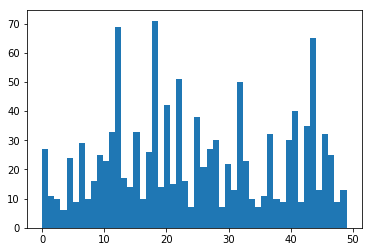

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure('cluster fig')
plt.hist(km.labels_, bins=k)
plt.show()

In [34]:
cluster_assignments_dict = {}

for i in set(km.labels_):
    current_cluster_chapters = [clean_dictionary_chapter_level.keys()[x] for x in np.where(km.labels_ == i)[0]]
    cluster_assignments_dict[i] = current_cluster_chapters

In [56]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print 'Cluster {0}'.format(cluster_pick)
cluster_assignments_dict[cluster_pick]

Cluster 31


['Genesis_Chapter 42',
 'Genesis_Chapter 47',
 'Genesis_Chapter 37',
 'Genesis_Chapter 48',
 'Genesis_Chapter 43',
 'Genesis_Chapter 45',
 'Nehemiah_Chapter 5',
 'Acts of the Apostles_Chapter 7',
 'Exodus_Chapter 1',
 'Genesis_Chapter 50',
 'Genesis_Chapter 39',
 'Genesis_Chapter 40',
 'Genesis_Chapter 46']

In [70]:
for key,val in cluster_assignments_dict.items():
    print('{0}:\n{1}\n'.format(key,'\n'.join(val)))

0:
Isaiah_Chapter 1
Matthew_Chapter 6
Matthew_Chapter 7
Corinthians 2_Chapter Corinthians 6
Joel_Chapter 1
Deuteronomy_Chapter 1
Ezekiel_Chapter 13
Luke_Chapter 6
Psalms_Chapter 24
Matthew_Chapter 23
Amos_Chapter 4
Amos_Chapter 5
Matthew_Chapter 25
Joshua_Chapter 23
Peter 1_Chapter Peter 2
Luke_Chapter 11
John_Chapter 16
Malachi_Chapter 1
Malachi_Chapter 2
James_Chapter 5
James_Chapter 4
Luke_Chapter 12
Matthew_Chapter 10
Malachi_Chapter 3
Samuel 1_Chapter Samuel 12
Micah_Chapter 2
Hebrews_Chapter 12

1:
Genesis_Chapter 25
Genesis_Chapter 29
Genesis_Chapter 27
Genesis_Chapter 28
Genesis_Chapter 36
Genesis_Chapter 35
Genesis_Chapter 34
Genesis_Chapter 33
Genesis_Chapter 32
Genesis_Chapter 31
Genesis_Chapter 30

2:
Chronicles 2_Chapter Chronicles 5
Samuel 1_Chapter Samuel 6
Samuel 1_Chapter Samuel 4
Samuel 1_Chapter Samuel 5
Genesis_Chapter 8
Genesis_Chapter 7
Genesis_Chapter 6
Samuel 2_Chapter Samuel 6
Chronicles 1_Chapter Chronicles 13
Chronicles 1_Chapter Chronicles 15

3:
Samuel 2_Ch

In [63]:

# def clean_chapter(raw_chapter):
#     """
#     Function to clean chapter text to keep only letters and remove stopwords
#     Returns a string of the cleaned chapter text
#     """
#     letters_only = re.sub('[^a-zA-Z]', ' ', raw_chapter)
#     words = letters_only.lower().split()
#     stopwords_eng = set(stopwords.words("english"))
#     stopwords_eng.add(u'chapter')
#     useful_words = [x for x in words if not x in stopwords_eng]
    
#     # Combine words into a paragraph again
#     useful_words_string = ' '.join(useful_words)
#     return(useful_words_string)

# cluster_themes_dict = {}

# for key in cluster_assignments_dict.keys():
#     current_tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
#     current_tfs = current_tfidf.fit_transform(map(clean_chapter, cluster_assignments_dict[key]))
    
#     current_tf_idfs = dict(zip(current_tfidf.get_feature_names(), current_tfidf.idf_))
#     tf_idfs_tuples = current_tf_idfs.items()
#     cluster_themes_dict[key] = sorted(tf_idfs_tuples, key = lambda x: x[1])[:7]  
# print 'Cluster 25 key words: {0}'.format([x[0] for x in cluster_themes_dict[25]])
# print 'Cluster 31 key words: {0}'.format([x[0] for x in cluster_themes_dict[31]])

0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17
18: 18
19: 19
20: 20
21: 21
22: 22
23: 23
24: 24
25: 25
26: 26
27: 27
28: 28
29: 29
30: 30
31: 31
32: 32
33: 33
34: 34
35: 35
36: 36
37: 37
38: 38
39: 39
40: 40
41: 41
42: 42
43: 43
44: 44
45: 45
46: 46
47: 47
48: 48
49: 49


In [58]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1189 samples in 0.007s...
[t-SNE] Computed neighbors for 1189 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1189
[t-SNE] Computed conditional probabilities for sample 1189 / 1189
[t-SNE] Mean sigma: 0.243229
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 69.7477951, gradient norm = 0.1508129 (50 iterations in 2.209s)
[t-SNE] Iteration 100: error = 68.5573425, gradient norm = 0.1632650 (50 iterations in 1.997s)
[t-SNE] Iteration 150: error = 68.7331543, gradient norm = 0.1665591 (50 iterations in 2.043s)
[t-SNE] Iteration 200: error = 68.5520859, gradient norm = 0.1497569 (50 iterations in 1.988s)
[t-SNE] Iteration 250: error = 67.9274673, gradient norm = 0.1750390 (50 iterations in 2.143s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.927467
[t-SNE] Iteration 300: error = 1.0149883, gradient norm = 0.0006742 (50 iterations in 1.524s

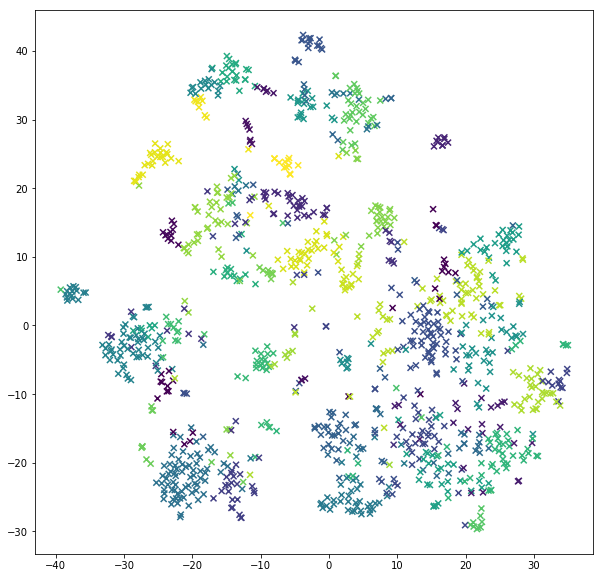

In [59]:
k = 50
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfidf_matrix)
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = km.labels_)
plt.show()